# Nonlinear ODE using sequential timestepping

We will solve a nonlinear ODE using serial timestepping and the implicit theta method.

The nonlinear ODE is small perturbation to the linear Dalhquist's ODE:

$$
\partial_{t}q = f(q) = \lambda q + wq^{2}
$$

As for the Dalhquist model, in general $\lambda=a+ib$ can be complex, which leads to oscillitory solutions with frequency $b$ and a decay rate $a$. For the solution to remain bounded for $t\geq0$ we require $a\leq0$ and $w\leq0$ so that the solution decays.

## Time discretisation

The implicit theta method is a single-step method which includes the first order forward and backward Euler methods, and the second order trapezium rule method as special cases.

The solution $q$ is discretised in time, with the discrete solution $q^{n}$ approximating $q(t^{n})$, where $t^{n}=n\Delta t$ and $\Delta t$ is the timestep size. The implicit theta method provides an update from the current timestep $q^{n}$ to the next timestep $q^{n+1}$ by:

$$
\frac{q^{n+1}-q^{n}}{\Delta t} = \theta f(q^{n+1}) + (1-\theta)f(q^{n})
$$

The time derivative is approximated using simple finite differences, and the right hand side is approximated by a weighted sum of the values at the current and next timestep. When $\theta=0$ we have the explicit forward Euler method, when $\theta=1$ we have the implicit backward Euler method, and when $\theta=0.5$ we have the trapezium rule.

## Implementing the discretisation

Now that we have a timestepping method, we can begin implementing it to find a time series of the solution.
First we define the simulation time `T`, the number of timesteps `nt`, the timestep size `dt`, the theta method parameter `theta`, the initial condition `q0`, and the eigenvalue `lamda`. We choose a $\lambda$ with a small real part so it decays only very gradually. This means that we can solve for longer times without the solution decaying to zero.

In [8]:
T = 102.4
nt = 1024
dt = T/nt
theta = 0.5
lamda = -0.02 + 0.3j
w = -0.25
q0 = 1

Next we set up the array to store the timeseries and set the initial condition.

In [9]:
import numpy as np

q = np.zeros(nt+1, dtype=complex)
q[0] = q0

We need functions to calculate the residual $f$, and the Jacobian of the residual $\frac{\partial f}{\partial q}$. The residual function is already filled in, but the Jacobian needs implementing.

In [10]:
def f(q):
    return lamda*q + w*q*q

def df(q):
    # fill in the jacobian here
    pass

As this is a nonlinear system, we will solve each timestep using Newton's method. This means that we need to reformulate the problem as a root-finding problem for $F(q^{n+1}; q^{n})=0$. The residual function $F$ is:

$$
F(q^{n+1}; q^{n}) = \frac{q^{n+1}-q^{n}}{\Delta t} - \theta f(q^{n+1}) - (1-\theta)f(q^{n}) = 0
$$

Implement this function below:

In [11]:
def residual(qn1, qn0):
    # nonlinear all-at-once function here
    pass

Now we can calculate the timeseries using SciPy's [Newton iteration function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html). We give the solution at the current timestep $q^{n}$ as the initial guess for the Newton iterations. The `args` kwarg is used to pass the current timestep as the second argument to `residual` (the first argument is the current $q^{n+1}$ guess.

In [12]:
from scipy.optimize import newton

for i in range(nt):
    q[i+1] = newton(residual, q[i], args=(q[i],))

Now we can visualise the evolution of $q$ over time.

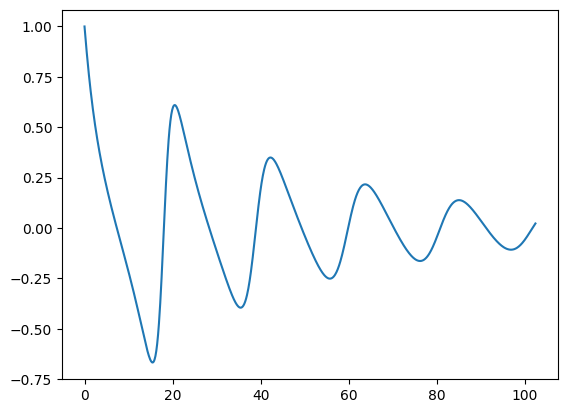

In [13]:
import matplotlib.pyplot as plt

time = np.linspace(0, nt*dt, num=nt+1, endpoint=True)

plt.plot(time, q.real)
plt.show()

Newton's method needs the Jacobian of the residual function to calculate the update at each iteration. But we didn't pass any way of calculating this Jacobian! SciPy approximates the Jacobian using finite differences and two evaluations of the residual function:

$$
\frac{\partial F}{\partial q} \approx \frac{F(q+\epsilon) - F(q)}{\epsilon}
$$

However we can also pass a function to calculate the Jacobian explicitly:

In [14]:
def jacobian(qn1, qn0):
    ddqdt = 1/dt
    dfq = theta(qn1)
    return ddqdt - dfq

Can you rerun the `newton` method again using this Jacobian? How does this affect the performance?